Question 01: 

The dataset is available here. You need to build a prediction model to identify fake notes based on several features extracted from bank-notes’ specimen pictures.

Q.1 Pre-Process the dataset by handling missing values and normalizing the data. Split in the ratio 70:20:10 for train-test-validation. [10 Marks]

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
names = ["variance", "skewness", "curtosis", "entropy", "class"]
df = pd.read_csv(url, header=None, names=names)
df.dropna()
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [8]:
scaler=StandardScaler()
df[["variance", "skewness", "curtosis", "entropy"]]=scaler.fit_transform(df[["variance", "skewness", "curtosis", "entropy"]])
df

,variance,skewness,curtosis,entropy,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


In [12]:
#performing splitting into train,test and validation databases

#splitting into train and testing
X=df.drop(columns=["class"])
y=df["class"]

X_train_val,X_test,y_train_val,y_test=train_test_split(X,y,test_size=0.1, random_state=42)

X_train,X_val,y_train,y_val=train_test_split(X_train_val,y_train_val,test_size=0.7/(0.7+0.2),random_state=42)

print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (274, 4)
Validation set shape: (960, 4)
Test set shape: (138, 4)


Q2. Train an SVM classifier using Sklearn library. Analyze the performance (classification accuracy) for different values of ‘C’. (Choose at least 5 different values of C) [25 marks]

For the C value being 0.1 the accuracy score is:- 0.9770833333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


For the C value being 1 the accuracy score is:- 0.9833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


For the C value being 10 the accuracy score is:- 0.9875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


For the C value being 100 the accuracy score is:- 0.9854166666666667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


For the C value being 1000 the accuracy score is:- 0.9833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


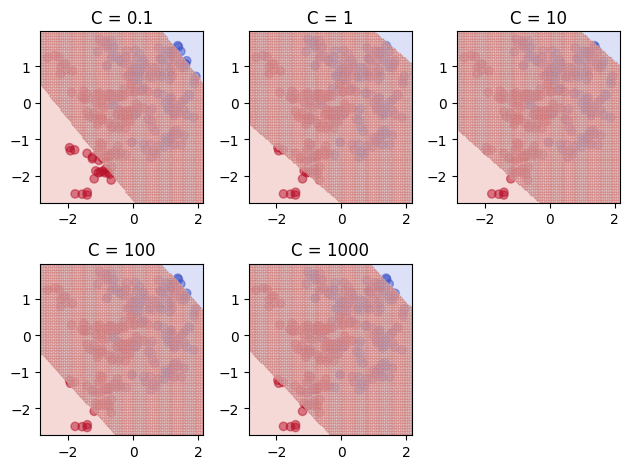

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


#as we have to choose different values of C hence we define a list and run a for loop

C_values=[0.1,1,10,100,1000]

for i in range(0,len(C_values)):
  svm=SVC(C=C_values[i],kernel='linear',random_state=42)
  svm.fit(X_train,y_train)
  y_pred=svm.predict(X_val)
  accuracy=accuracy_score(y_val,y_pred)
  print("For the C value being",C_values[i] ,"the accuracy score is:-",accuracy)

  plt.subplot(2, 3, i + 1)
  plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, cmap='coolwarm', alpha=0.5)
  xlim = plt.xlim()
  ylim = plt.ylim()
  xmin, xmax = X_train.values[:, 0].min() - 1, X_train.values[:, 0].max() + 1
  ymin, ymax = X_train.values[:, 1].min() - 1, X_train.values[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.02), np.arange(ymin, ymax, 0.02))
  X_grid = np.c_[xx.ravel(), yy.ravel(), np.tile([xmin, xmax], xx.size // 2), np.tile([ymin, ymax], xx.size // 2)]
  Z = svm.predict(X_grid)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.2)
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.title('C = {}'.format(C_values[i]))
    
plt.tight_layout()
plt.show()


Q3. Use various types of kernels(RBF, Linear, Quadratic etc) and train the SVM model using the Sklearn library. Plot the decision boundary for different svm models trained. [25 marks]

For the C value being 0.1 the accuracy score is:- 0.9708333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


For the C value being 1 the accuracy score is:- 0.9833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


For the C value being 10 the accuracy score is:- 0.984375


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


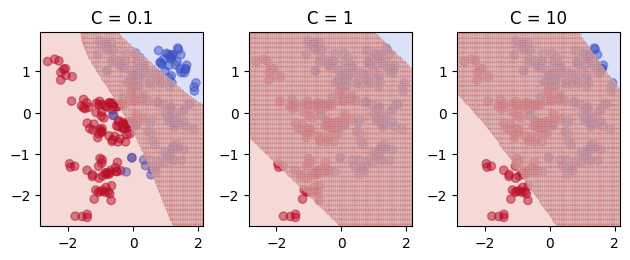

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

kernels=["rbf","linear","poly"]
C_values1=[0.1,1,10]


for i in range(0,len(kernels)):
  svm=SVC(C=C_values1[i],kernel=kernels[i],random_state=42)
  svm.fit(X_train,y_train)
  y_pred=svm.predict(X_val)
  accuracy=accuracy_score(y_val,y_pred)
  
  print("For the C value being",C_values1[i] ,"the accuracy score is:-",accuracy)
  

  lda = LDA(n_components=1)
  X_train_lda = lda.fit_transform(X_train, y_train)
  X_val_lda = lda.transform(X_val)
  X_test_lda = lda.transform(X_test)

  plt.subplot(2, 3, i + 1)
  plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, cmap='coolwarm', alpha=0.5)
  xlim = plt.xlim()
  ylim = plt.ylim()
  xmin, xmax = X_train.values[:, 0].min() - 1, X_train.values[:, 0].max() + 1
  ymin, ymax = X_train.values[:, 1].min() - 1, X_train.values[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.02), np.arange(ymin, ymax, 0.02))
  X_grid = np.c_[xx.ravel(), yy.ravel(), np.tile([xmin, xmax], xx.size // 2), np.tile([ymin, ymax], xx.size // 2)]
  Z = svm.predict(X_grid)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.2)
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.title('C = {}'.format(C_values[i]))

plt.tight_layout()
plt.show()
